Question 1

What is the fundamental idea behind Support Vector Machines?

Answer

The fundamental idea behind Support Vector Machines is to fit the widest possi‐ ble “street” between the classes. In other words, the goal is to have the largest pos‐ sible margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and hav‐ ing the widest possible street (i.e., a few instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets.

___________________________________________________________________________________________________________________

Question 2

What is a support vector?

Answer

After training an SVM, a support vector is any instance located on the “street” (see the previous answer), including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., is off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street they won’t affect the decision boundary. Computing the predictions only involves the sup‐ port vectors, not the whole training set.

___________________________________________________________________________________________________________________

Question 3

Why is it important to scale the inputs when using SVMs?


Answer

SVMs try to fit the largest possible “street” between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features

___________________________________________________________________________________________________________________

Question 4

Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

Answer 

An SVM classifier can output the distance between the test instance and the deci‐ sion boundary, and you can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.

___________________________________________________________________________________________________________________

Question 5

Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

Answer 

This question applies only to linear SVMs since kernelized SVMs can only use the dual form. The computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, while the compu‐ tational complexity of the dual form is proportional to a number between m2 and m3. So if there are millions of instances, you should definitely use the primal form, because the dual form will be much too slow.


___________________________________________________________________________________________________________________

Question 6

Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?

Answer 

If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, you need to increase gamma or C (or both).

___________________________________________________________________________________________________________________

Question 7

How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?

Answer

Let’s call the QP parameters for the hard margin problem H′, f′, A′, and b′ (see “Quadratic Programming” on page 167). The QP parameters for the soft margin problem have m additional parameters (np = n + 1 + m) and m additional constraints (nc = 2m). They can be defined like so:

• H is equal to H′, plus m columns of 0s on the right and m rows of 0s at the bottom

• f is equal to f′ with m additional elements, all equal to the value of the hyper‐ parameter C.

• b is equal to b′ with m additional elements, all equal to 0.

• A is equal to A′, with an extra m × m identity matrix Im appended to the right, Im –*I*m just below it, and the rest filled with 0s

___________________________________________________________________________________________________________________

Question 8 

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import os

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [3]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


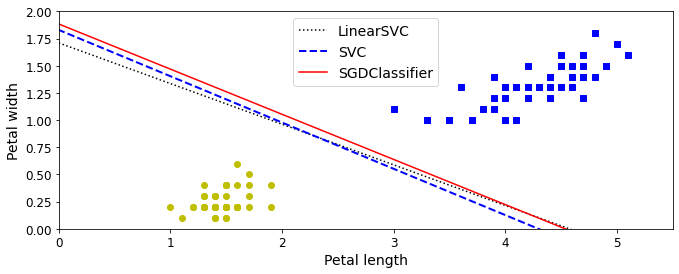

In [6]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]


line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])


plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

From the figure above, it can be seen that  LinearSVC, SVC and SDG Classifier appear close enough. This implies that I was able to get them to produce roughly the same model.

___________________________________________________________________________________________________________________

Question 9 

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Starting with a simple, linear SVM classifier. 

In [16]:
lin_clf = LinearSVC(random_state=42, max_iter=3000)
lin_clf.fit(X_train, y_train)

/Users/giftosasu/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=3000, random_state=42)

Making predictions on the training set and measuring the accuracy 

In [17]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.88225

88.2% accuracy on MNIST is bad. This linear model is certainly too simple for MNIST so we scale the data first

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [20]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/Users/giftosasu/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [21]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9217333333333333

A 92.1% accuracy is much better but still not good enough for MNIST.

Let's try an SVC with an RBF kernel.

In [22]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [23]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

That's promising, we get better performance even though we trained the model on 6 times less data.

Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.301065602125842, gamma=0.0016375376918346955 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=8.301065602125842, gamma=0.0016375376918346955, total=   0.8s
[CV] C=8.301065602125842, gamma=0.0016375376918346955 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] . C=8.301065602125842, gamma=0.0016375376918346955, total=   0.7s
[CV] C=8.301065602125842, gamma=0.0016375376918346955 ................
[CV] . C=8.301065602125842, gamma=0.0016375376918346955, total=   0.7s
[CV] C=10.895983271115572, gamma=0.008248546754919282 ................
[CV] . C=10.895983271115572, gamma=0.008248546754919282, total=   0.9s
[CV] C=10.895983271115572, gamma=0.008248546754919282 ................
[CV] . C=10.895983271115572, gamma=0.008248546754919282, total=   0.9s
[CV] C=10.895983271115572, gamma=0.008248546754919282 ................
[CV] . C=10.895983271115572, gamma=0.008248546754919282, total=   0.9s
[CV] C=3.051330138720311, gamma=0.0023275957335098306 ................
[CV] . C=3.051330138720311, gamma=0.0023275957335098306, total=   0.8s
[CV] C=3.051330138720311, gamma=0.0023275957335098306 ................
[CV] . C=3.051330138720311, gamma=0.0023275957335098306, total=   0.8s
[CV] C=3.051330138720311, gamma=0.0023275957335098306 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   27.0s finished


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11e032460>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11e000760>},
                   verbose=2)

In [25]:
rnd_search_cv.best_estimator_

SVC(C=6.325079113895822, gamma=0.0013106833353111044)

In [26]:
rnd_search_cv.best_score_

0.8629917342492193

In [28]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=6.325079113895822, gamma=0.0013106833353111044)

In [29]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9980666666666667

The above model has an accuracy of 99.8%; which is very good. So, we can finalize by testing it on the test set

In [30]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9728

___________________________________________________________________________________________________________________

Question 10

Train an SVM regressor on the California housing dataset.

In [31]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/Users/giftosasu/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

Evaluating the RMSE 

In [36]:
np.sqrt(mse)

0.9819256687727764

From the above, we can tell that there will errors of about $10,000 which is not so good. 

Going on with RBF Kernel

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.4s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.2s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.6s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.5s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.5s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   4.0s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   4.0s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11e26a280>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11e26a310>},
                   random_state=42, verbose=2)

In [38]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [39]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785359

This appears to be better than the linear model. Therefore we select this model and evaluate it on the test set.

In [40]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528734